In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('housing_train.csv')
df

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7039061606,https://bham.craigslist.org/apa/d/birmingham-h...,birmingham,https://bham.craigslist.org,1195,apartment,1908,3,2.0,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00L0L_80pNkyDeG0...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
1,7041970863,https://bham.craigslist.org/apa/d/birmingham-w...,birmingham,https://bham.craigslist.org,1120,apartment,1319,3,2.0,1,...,0,0,0,laundry on site,off-street parking,https://images.craigslist.org/00707_uRrY9CsNMC...,Find Your Way to Haven Apartment Homes Come ho...,33.3755,-86.8045,al
2,7041966914,https://bham.craigslist.org/apa/d/birmingham-g...,birmingham,https://bham.craigslist.org,825,apartment,1133,1,1.5,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00h0h_b7Bdj1NLBi...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
3,7041966936,https://bham.craigslist.org/apa/d/birmingham-f...,birmingham,https://bham.craigslist.org,800,apartment,927,1,1.0,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00808_6ghZ8tSRQs...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
4,7041966888,https://bham.craigslist.org/apa/d/birmingham-2...,birmingham,https://bham.craigslist.org,785,apartment,1047,2,1.0,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00y0y_21c0FOvUXm...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265185,7050851033,https://columbus.craigslist.org/apa/d/columbus...,columbus,https://columbus.craigslist.org,0,apartment,1061,2,2.0,1,...,0,0,0,w/d in unit,detached garage,https://images.craigslist.org/00m0m_8wP9hX96TZ...,â BERKLEY HOUSE â Voted #1 BEST Communit...,40.0495,-83.0669,oh
265186,7050887997,https://columbus.craigslist.org/apa/d/grove-ci...,columbus,https://columbus.craigslist.org,1069,apartment,1020,2,1.5,1,...,0,0,0,w/d hookups,detached garage,https://images.craigslist.org/00N0N_ioCvFNCv24...,!!!!Tour today and receive $5 Starbucks gift c...,39.8408,-83.0804,oh
265187,7044801015,https://columbus.craigslist.org/apa/d/columbus...,columbus,https://columbus.craigslist.org,1507,apartment,1660,2,1.5,1,...,0,0,0,NaN,NaN,https://images.craigslist.org/00j0j_5EIRWzdHCV...,"The Commons at Olentangy4765 Blairfield Dr, Co...",40.0564,-83.0417,oh
265188,7050885800,https://columbus.craigslist.org/apa/d/newark-l...,columbus,https://columbus.craigslist.org,1001,apartment,1220,3,1.5,1,...,0,0,0,w/d hookups,off-street parking,https://images.craigslist.org/00J0J_6VSTqFJb86...,www.McMillenWoods.com www.mcmillenwoods.com ...,40.0451,-82.4564,oh


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265190 entries, 0 to 265189
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       265190 non-null  int64  
 1   url                      265190 non-null  object 
 2   region                   265190 non-null  object 
 3   region_url               265190 non-null  object 
 4   price                    265190 non-null  int64  
 5   type                     265190 non-null  object 
 6   sqfeet                   265190 non-null  int64  
 7   beds                     265190 non-null  int64  
 8   baths                    265190 non-null  float64
 9   cats_allowed             265190 non-null  int64  
 10  dogs_allowed             265190 non-null  int64  
 11  smoking_allowed          265190 non-null  int64  
 12  wheelchair_access        265190 non-null  int64  
 13  electric_vehicle_charge  265190 non-null  int64  
 14  come

In [4]:
df.isnull().sum()

id                             0
url                            0
region                         0
region_url                     0
price                          0
type                           0
sqfeet                         0
beds                           0
baths                          0
cats_allowed                   0
dogs_allowed                   0
smoking_allowed                0
wheelchair_access              0
electric_vehicle_charge        0
comes_furnished                0
laundry_options            54311
parking_options            95135
image_url                      0
description                    2
lat                         1419
long                        1419
state                          1
dtype: int64

First thing, we need to check the missing values.

since "laundry_options" & "parking_options" & "state" are categorical variables
then we will fill the missing values with the mode

In [5]:
df['parking_options'].mode()[0]

'off-street parking'

In [6]:
df['laundry_options'].mode()[0]

'w/d in unit'

In [7]:
df['parking_options'].fillna(df['parking_options'].mode()[0], inplace=True)
df['laundry_options'].fillna(df['laundry_options'].mode()[0], inplace=True)
df

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7039061606,https://bham.craigslist.org/apa/d/birmingham-h...,birmingham,https://bham.craigslist.org,1195,apartment,1908,3,2.0,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00L0L_80pNkyDeG0...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
1,7041970863,https://bham.craigslist.org/apa/d/birmingham-w...,birmingham,https://bham.craigslist.org,1120,apartment,1319,3,2.0,1,...,0,0,0,laundry on site,off-street parking,https://images.craigslist.org/00707_uRrY9CsNMC...,Find Your Way to Haven Apartment Homes Come ho...,33.3755,-86.8045,al
2,7041966914,https://bham.craigslist.org/apa/d/birmingham-g...,birmingham,https://bham.craigslist.org,825,apartment,1133,1,1.5,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00h0h_b7Bdj1NLBi...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
3,7041966936,https://bham.craigslist.org/apa/d/birmingham-f...,birmingham,https://bham.craigslist.org,800,apartment,927,1,1.0,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00808_6ghZ8tSRQs...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
4,7041966888,https://bham.craigslist.org/apa/d/birmingham-2...,birmingham,https://bham.craigslist.org,785,apartment,1047,2,1.0,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00y0y_21c0FOvUXm...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265185,7050851033,https://columbus.craigslist.org/apa/d/columbus...,columbus,https://columbus.craigslist.org,0,apartment,1061,2,2.0,1,...,0,0,0,w/d in unit,detached garage,https://images.craigslist.org/00m0m_8wP9hX96TZ...,â BERKLEY HOUSE â Voted #1 BEST Communit...,40.0495,-83.0669,oh
265186,7050887997,https://columbus.craigslist.org/apa/d/grove-ci...,columbus,https://columbus.craigslist.org,1069,apartment,1020,2,1.5,1,...,0,0,0,w/d hookups,detached garage,https://images.craigslist.org/00N0N_ioCvFNCv24...,!!!!Tour today and receive $5 Starbucks gift c...,39.8408,-83.0804,oh
265187,7044801015,https://columbus.craigslist.org/apa/d/columbus...,columbus,https://columbus.craigslist.org,1507,apartment,1660,2,1.5,1,...,0,0,0,w/d in unit,off-street parking,https://images.craigslist.org/00j0j_5EIRWzdHCV...,"The Commons at Olentangy4765 Blairfield Dr, Co...",40.0564,-83.0417,oh
265188,7050885800,https://columbus.craigslist.org/apa/d/newark-l...,columbus,https://columbus.craigslist.org,1001,apartment,1220,3,1.5,1,...,0,0,0,w/d hookups,off-street parking,https://images.craigslist.org/00J0J_6VSTqFJb86...,www.McMillenWoods.com www.mcmillenwoods.com ...,40.0451,-82.4564,oh


since "lat" & "long" are numerical variables
then we will fill the missing values with the mean

In [8]:
df['lat'].fillna(df['lat'].mean() ,inplace=True)
df['long'].fillna(df['long'].mean(), inplace=True)
df

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7039061606,https://bham.craigslist.org/apa/d/birmingham-h...,birmingham,https://bham.craigslist.org,1195,apartment,1908,3,2.0,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00L0L_80pNkyDeG0...,Apartments In Birmingham AL Welcome to 100 Inv...,33.422600,-86.706500,al
1,7041970863,https://bham.craigslist.org/apa/d/birmingham-w...,birmingham,https://bham.craigslist.org,1120,apartment,1319,3,2.0,1,...,0,0,0,laundry on site,off-street parking,https://images.craigslist.org/00707_uRrY9CsNMC...,Find Your Way to Haven Apartment Homes Come ho...,33.375500,-86.804500,al
2,7041966914,https://bham.craigslist.org/apa/d/birmingham-g...,birmingham,https://bham.craigslist.org,825,apartment,1133,1,1.5,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00h0h_b7Bdj1NLBi...,Apartments In Birmingham AL Welcome to 100 Inv...,33.422600,-86.706500,al
3,7041966936,https://bham.craigslist.org/apa/d/birmingham-f...,birmingham,https://bham.craigslist.org,800,apartment,927,1,1.0,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00808_6ghZ8tSRQs...,Apartments In Birmingham AL Welcome to 100 Inv...,33.422600,-86.706500,al
4,7041966888,https://bham.craigslist.org/apa/d/birmingham-2...,birmingham,https://bham.craigslist.org,785,apartment,1047,2,1.0,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00y0y_21c0FOvUXm...,Apartments In Birmingham AL Welcome to 100 Inv...,33.422600,-86.706500,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265185,7050851033,https://columbus.craigslist.org/apa/d/columbus...,columbus,https://columbus.craigslist.org,0,apartment,1061,2,2.0,1,...,0,0,0,w/d in unit,detached garage,https://images.craigslist.org/00m0m_8wP9hX96TZ...,â BERKLEY HOUSE â Voted #1 BEST Communit...,40.049500,-83.066900,oh
265186,7050887997,https://columbus.craigslist.org/apa/d/grove-ci...,columbus,https://columbus.craigslist.org,1069,apartment,1020,2,1.5,1,...,0,0,0,w/d hookups,detached garage,https://images.craigslist.org/00N0N_ioCvFNCv24...,!!!!Tour today and receive $5 Starbucks gift c...,39.840800,-83.080400,oh
265187,7044801015,https://columbus.craigslist.org/apa/d/columbus...,columbus,https://columbus.craigslist.org,1507,apartment,1660,2,1.5,1,...,0,0,0,w/d in unit,off-street parking,https://images.craigslist.org/00j0j_5EIRWzdHCV...,"The Commons at Olentangy4765 Blairfield Dr, Co...",40.056400,-83.041700,oh
265188,7050885800,https://columbus.craigslist.org/apa/d/newark-l...,columbus,https://columbus.craigslist.org,1001,apartment,1220,3,1.5,1,...,0,0,0,w/d hookups,off-street parking,https://images.craigslist.org/00J0J_6VSTqFJb86...,www.McMillenWoods.com www.mcmillenwoods.com ...,40.045100,-82.456400,oh


In [9]:
df.isnull().sum()

id                         0
url                        0
region                     0
region_url                 0
price                      0
type                       0
sqfeet                     0
beds                       0
baths                      0
cats_allowed               0
dogs_allowed               0
smoking_allowed            0
wheelchair_access          0
electric_vehicle_charge    0
comes_furnished            0
laundry_options            0
parking_options            0
image_url                  0
description                2
lat                        0
long                       0
state                      1
dtype: int64

In [10]:
df.describe()

,id,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
count,2.651900e+05,2.651900e+05,2.651900e+05,265190.000000,265190.000000,265190.000000,265190.000000,265190.000000,265190.000000,265190.000000,265190.000000,265190.000000,265190.000000
mean,7.040888e+09,1.227285e+04,1.093678e+03,1.912414,1.483468,0.716822,0.696550,0.733896,0.078759,0.014360,0.048644,37.208855,-92.398149
std,8.778930e+06,5.376352e+06,2.306888e+04,3.691900,0.630208,0.450543,0.459749,0.441920,0.269362,0.118968,0.215124,5.644486,17.324243
min,7.003808e+09,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-43.533300,-163.894000
25%,7.035963e+09,8.170000e+02,7.520000e+02,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.522225,-104.531750
50%,7.043109e+09,1.060000e+03,9.500000e+02,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,37.974300,-86.536600
75%,7.048362e+09,1.450000e+03,1.156000e+03,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,41.144550,-81.292200
max,7.051263e+09,2.768307e+09,8.388607e+06,1100.000000,75.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,102.036000,172.633000


In [11]:
# we need to drop unimportant features such as "id","url","region_url","image_url","description", "state", "region"
df.drop(['id','url','region_url', 'image_url','description', 'state', 'region'],axis=1, inplace=True)
df


,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long
0,1195,apartment,1908,3,2.0,1,1,1,0,0,0,laundry on site,street parking,33.422600,-86.706500
1,1120,apartment,1319,3,2.0,1,1,1,0,0,0,laundry on site,off-street parking,33.375500,-86.804500
2,825,apartment,1133,1,1.5,1,1,1,0,0,0,laundry on site,street parking,33.422600,-86.706500
3,800,apartment,927,1,1.0,1,1,1,0,0,0,laundry on site,street parking,33.422600,-86.706500
4,785,apartment,1047,2,1.0,1,1,1,0,0,0,laundry on site,street parking,33.422600,-86.706500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265185,0,apartment,1061,2,2.0,1,1,1,0,0,0,w/d in unit,detached garage,40.049500,-83.066900
265186,1069,apartment,1020,2,1.5,1,1,1,0,0,0,w/d hookups,detached garage,39.840800,-83.080400
265187,1507,apartment,1660,2,1.5,1,1,1,0,0,0,w/d in unit,off-street parking,40.056400,-83.041700
265188,1001,apartment,1220,3,1.5,1,1,1,0,0,0,w/d hookups,off-street parking,40.045100,-82.456400


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265190 entries, 0 to 265189
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   price                    265190 non-null  int64  
 1   type                     265190 non-null  object 
 2   sqfeet                   265190 non-null  int64  
 3   beds                     265190 non-null  int64  
 4   baths                    265190 non-null  float64
 5   cats_allowed             265190 non-null  int64  
 6   dogs_allowed             265190 non-null  int64  
 7   smoking_allowed          265190 non-null  int64  
 8   wheelchair_access        265190 non-null  int64  
 9   electric_vehicle_charge  265190 non-null  int64  
 10  comes_furnished          265190 non-null  int64  
 11  laundry_options          265190 non-null  object 
 12  parking_options          265190 non-null  object 
 13  lat                      265190 non-null  float64
 14  long

In [13]:
df.describe()

,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
count,2.651900e+05,2.651900e+05,265190.000000,265190.000000,265190.000000,265190.000000,265190.000000,265190.000000,265190.000000,265190.000000,265190.000000,265190.000000
mean,1.227285e+04,1.093678e+03,1.912414,1.483468,0.716822,0.696550,0.733896,0.078759,0.014360,0.048644,37.208855,-92.398149
std,5.376352e+06,2.306888e+04,3.691900,0.630208,0.450543,0.459749,0.441920,0.269362,0.118968,0.215124,5.644486,17.324243
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-43.533300,-163.894000
25%,8.170000e+02,7.520000e+02,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.522225,-104.531750
50%,1.060000e+03,9.500000e+02,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,37.974300,-86.536600
75%,1.450000e+03,1.156000e+03,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,41.144550,-81.292200
max,2.768307e+09,8.388607e+06,1100.000000,75.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,102.036000,172.633000


from the describtion above, it seems like "beds" and "baths" have outliers as their max are "1100" and "75" respectively and this doesn't make sense

<AxesSubplot:xlabel='beds'>

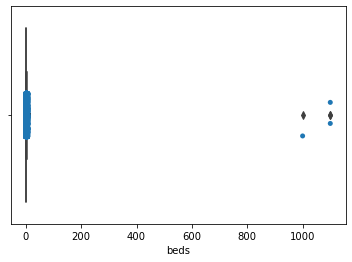

In [14]:
sns.boxplot(x='beds',data=df)
sns.stripplot(x='beds',data=df)

<AxesSubplot:xlabel='baths'>

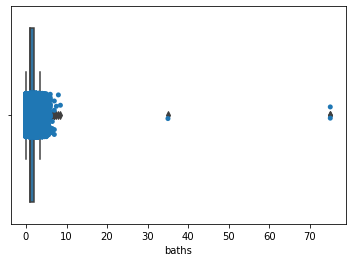

In [15]:
sns.boxplot(x='baths',data=df)
sns.stripplot(x='baths',data=df)

As shown from the above two figures, there exist actual outliers in both features "beds" and "baths". so we need to deal with them first 

In [16]:
from datasist.structdata import detect_outliers
outlier_indices=detect_outliers(df,0,['beds'])

<AxesSubplot:xlabel='beds'>

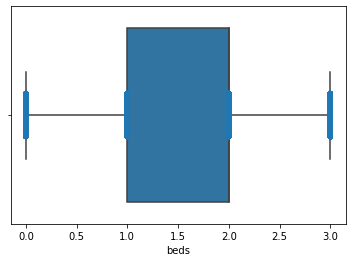

In [17]:
df.drop(outlier_indices,inplace=True)

sns.boxplot(x='beds',data=df)
sns.stripplot(x='beds',data=df)


In [18]:
outlier_indices=detect_outliers(df,0,['baths'])

<AxesSubplot:xlabel='baths'>

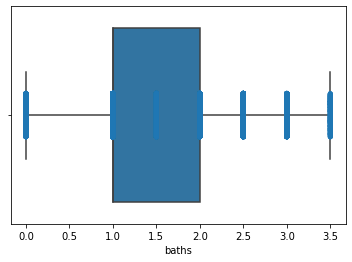

In [19]:
df.drop(outlier_indices,inplace=True)

sns.boxplot(x='baths',data=df)
sns.stripplot(x='baths',data=df)


In [20]:
df.describe()

,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
count,2.550810e+05,2.550810e+05,255081.000000,255081.000000,255081.000000,255081.000000,255081.000000,255081.000000,255081.000000,255081.000000,255081.000000,255081.000000
mean,1.262535e+04,1.053258e+03,1.809249,1.442212,0.723057,0.700930,0.736390,0.078936,0.014462,0.044931,37.194145,-92.360875
std,5.481798e+06,2.334677e+04,0.762337,0.537718,0.447489,0.457851,0.440591,0.269639,0.119386,0.207153,5.636000,17.321940
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-40.266600,-163.894000
25%,8.150000e+02,7.500000e+02,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.516400,-103.649000
50%,1.050000e+03,9.400000e+02,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,37.965100,-86.508300
75%,1.430000e+03,1.124000e+03,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,41.137900,-81.286300
max,2.768307e+09,8.388607e+06,3.000000,3.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,102.036000,94.156100


<AxesSubplot:xlabel='smoking_allowed', ylabel='price'>

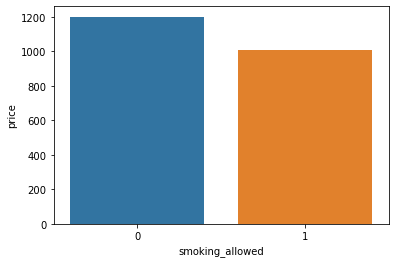

In [21]:
sns.barplot(x='smoking_allowed',y='price',data=df,estimator=np.median)

As seen from the figure above, allowing smoking in the unit doesn't have a significat effect on the price

<AxesSubplot:xlabel='comes_furnished', ylabel='price'>

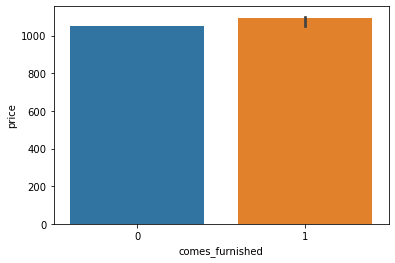

In [22]:
sns.barplot(x='comes_furnished',y='price',data=df,estimator=np.median)

As seen from the figure above, the price of the unit is not affected by whether the unit comes furnished or not

<AxesSubplot:xlabel='beds', ylabel='price'>

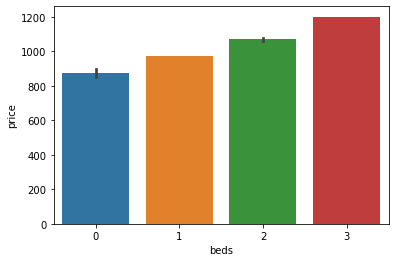

In [23]:
sns.barplot(x='beds',y='price',data=df,estimator=np.median)

It seems that there's a relationship between beds and price, the higher the number of beds, the higher the price. which makes sense of course

<AxesSubplot:xlabel='baths', ylabel='price'>

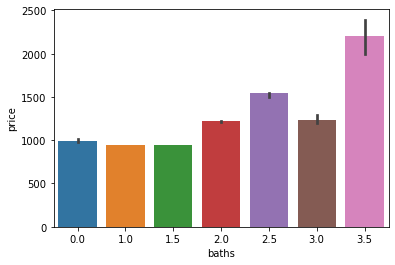

In [24]:
sns.barplot(x='baths',y='price',data=df,estimator=np.median)

it doesn't make sense that the number of bathrooms is float -having decimals-, so we need to round it 

In [25]:
df.baths= df.baths.round()

<AxesSubplot:xlabel='baths', ylabel='price'>

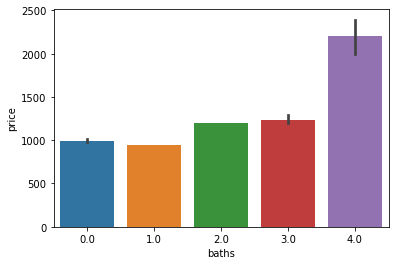

In [26]:
sns.barplot(x='baths',y='price',data=df,estimator=np.median)

It seems that there's a relationship between baths and price, the higher the number of baths, the higher the price. which makes sense of course

<AxesSubplot:xlabel='laundry_options', ylabel='price'>

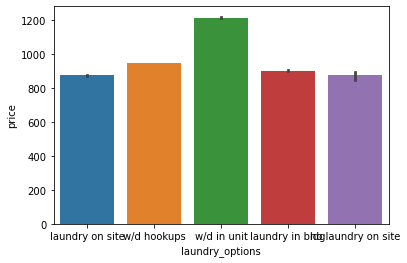

In [27]:
sns.barplot(x='laundry_options',y='price',data=df,estimator=np.median)

As seen from the figure above, W/d in the unit affect the price positively. Units having W/D laundry option are pricy than those not having it.

Ps; W/D is some advanced laundry option. 

In [28]:
df['type'].value_counts()

apartment          214811
house               18028
townhouse            9860
condo                4591
duplex               3279
manufactured         2886
cottage/cabin         623
loft                  510
flat                  344
in-law                145
land                    3
assisted living         1
Name: type, dtype: int64

In [29]:
df['laundry_options'].value_counts()

w/d in unit           138852
w/d hookups            47669
laundry on site        38641
laundry in bldg        27418
no laundry on site      2501
Name: laundry_options, dtype: int64

In [30]:
df['parking_options'].value_counts()

off-street parking    177821
carport                28351
attached garage        24349
detached garage        12238
street parking         10245
no parking              1959
valet parking            118
Name: parking_options, dtype: int64

<AxesSubplot:>

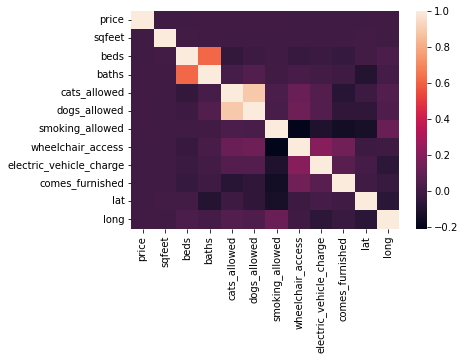

In [31]:
sns.heatmap(df.corr())

now, we need to convert categorical variables to dummies 

In [32]:
df=pd.get_dummies(df,columns=['type','laundry_options', 'parking_options'],drop_first=True)
df

,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,...,laundry_options_laundry on site,laundry_options_no laundry on site,laundry_options_w/d hookups,laundry_options_w/d in unit,parking_options_carport,parking_options_detached garage,parking_options_no parking,parking_options_off-street parking,parking_options_street parking,parking_options_valet parking
0,1195,1908,3,2.0,1,1,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1120,1319,3,2.0,1,1,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,825,1133,1,2.0,1,1,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,800,927,1,1.0,1,1,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,785,1047,2,1.0,1,1,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265185,0,1061,2,2.0,1,1,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
265186,1069,1020,2,2.0,1,1,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
265187,1507,1660,2,2.0,1,1,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
265188,1001,1220,3,2.0,1,1,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [33]:
x=df.drop('price',axis=1)
y=df['price']


In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=40)


In [35]:
x_train

,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,...,laundry_options_laundry on site,laundry_options_no laundry on site,laundry_options_w/d hookups,laundry_options_w/d in unit,parking_options_carport,parking_options_detached garage,parking_options_no parking,parking_options_off-street parking,parking_options_street parking,parking_options_valet parking
5134,1174,3,2.0,1,1,1,0,0,0,32.3791,...,0,0,1,0,0,0,0,1,0,0
132830,1219,3,2.0,1,1,1,0,0,0,38.4917,...,1,0,0,0,0,0,0,1,0,0
177633,768,1,1.0,1,1,1,0,0,0,41.9446,...,0,0,0,0,0,0,0,1,0,0
236582,839,1,1.0,0,0,0,1,0,0,40.5350,...,0,0,0,1,0,0,0,1,0,0
243102,876,2,1.0,1,1,1,0,0,0,32.8882,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96635,1200,2,2.0,1,1,1,0,0,0,28.1626,...,1,0,0,0,0,0,0,1,0,0
219547,770,1,1.0,1,1,1,0,0,0,36.1032,...,0,0,0,1,0,0,0,1,0,0
31742,850,2,2.0,1,1,1,0,0,0,33.5734,...,0,0,0,1,1,0,0,0,0,0
117065,850,2,1.0,1,1,1,1,0,0,20.9048,...,0,0,1,0,0,0,0,1,0,0


In [36]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [37]:
x_train

array([[ 0.00855603,  1.56294689,  0.99290205, ...,  0.65982743,
        -0.20504997, -0.02159403],
       [ 0.0111578 ,  1.56294689,  0.99290205, ...,  0.65982743,
        -0.20504997, -0.02159403],
       [-0.01491775, -1.06192029, -0.86022882, ...,  0.65982743,
        -0.20504997, -0.02159403],
       ...,
       [-0.01017674,  0.2505133 ,  0.99290205, ..., -1.51554779,
        -0.20504997, -0.02159403],
       [-0.01017674,  0.2505133 , -0.86022882, ...,  0.65982743,
        -0.20504997, -0.02159403],
       [-0.00711243,  0.2505133 , -0.86022882, ...,  0.65982743,
        -0.20504997, -0.02159403]])

In [38]:
from xgboost import XGBRegressor
model={'XGBR':XGBRegressor()}

In [39]:
for name,model in model.items():
    print(f'using:{name}')
    model.fit(x_train,y_train)
    print(f'training accuracy: {model.score(x_train,y_train)}')
    print(f'testing accuracy: {model.score(x_test,y_test)}')


using:XGBR
training accuracy: 0.9999292324955081
testing accuracy: 0.9663254748904649


In [40]:
model=XGBRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test )


0.9663254748904649

In [41]:
x.columns

Index(['sqfeet', 'beds', 'baths', 'cats_allowed', 'dogs_allowed',
       'smoking_allowed', 'wheelchair_access', 'electric_vehicle_charge',
       'comes_furnished', 'lat', 'long', 'type_assisted living', 'type_condo',
       'type_cottage/cabin', 'type_duplex', 'type_flat', 'type_house',
       'type_in-law', 'type_land', 'type_loft', 'type_manufactured',
       'type_townhouse', 'laundry_options_laundry on site',
       'laundry_options_no laundry on site', 'laundry_options_w/d hookups',
       'laundry_options_w/d in unit', 'parking_options_carport',
       'parking_options_detached garage', 'parking_options_no parking',
       'parking_options_off-street parking', 'parking_options_street parking',
       'parking_options_valet parking'],
      dtype='object')

In [46]:
data=[230,2,2,0,1,0,0,0,0,33.422600,86.706500]+[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]+[0, 1, 0, 0]+[0, 0, 1, 0, 0, 0]
data=scaler.transform([data])
pred=model.predict(data)
pred


array([16872370.], dtype=float32)

In [43]:
import joblib

In [44]:
joblib.dump(model,'model_new.h5')
joblib.dump(scaler,'scaler_new.h5')
joblib.dump(x.columns,'features_new.h5')

['features_new.h5']